In [16]:
import matplotlib.pyplot as plt
import numpy as np

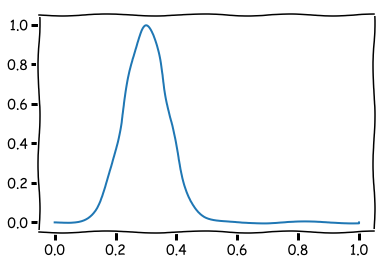

In [31]:
n_points = 1000
x = np.linspace(0.0,1.0,n_points)
u_initial = np.exp(-((x-0.3)*(x-0.3))/0.01)
with plt.xkcd():
    plt.plot(x,u_initial)
    plt.show()

In [19]:
#find the first iteration for fixed boundary conditions
delta_x = x[1]-x[0]
delta_t = 0.0005
c = 1.0
r = c * delta_t / delta_x

print r # remember, this should be less than 1.0 for this scheme to work

#fixed boundary conditions
u_initial[0] = 0.0
u_initial[n_points-1] = 0.0

u_future = np.zeros(n_points)
u_future[0] = 0.0
u_future[n_points-1] = 0.0

for i in range(1,n_points-1):
    u_future[i] = u_initial[i] + (r**2/2.0) * (u_initial[i+1] - 2.0 * u_initial[i] + u_initial[i-1])

#create a new variable to hold the previous value
u_past = u_initial.copy()
#create a new variable to hold the present value
u_present = u_future.copy()

0.4995


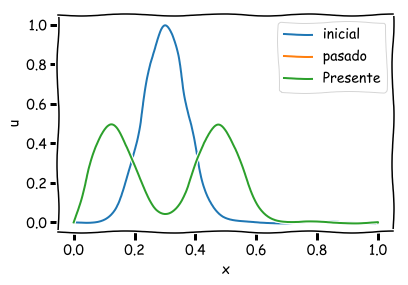

In [30]:
with plt.xkcd():
    h = plt.plot(x, u_initial, label = "inicial" )
    plt.plot(x, u_past, label = 'pasado')
    plt.plot(x, u_present, label = "Presente")
    plt.xlabel('x')
    plt.ylabel('u')
    plt.legend(loc=1)
    plt.show(h)

In [22]:
#next iterations
n_time = 350
for j in range(n_time):
    for i in range(1,n_points-1):
        u_future[i] = (2.0*(1.0-r**2))*u_present[i] - u_past[i] + (r**2)*(u_present[i+1] +  u_present[i-1])
    u_past = u_present.copy()
    #create a new variable to hold the present value
    u_present = u_future.copy()

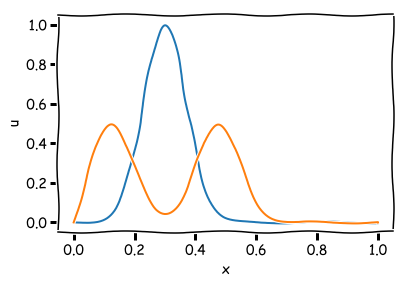

In [33]:
with plt.xkcd():
    j = plt.plot(x, u_initial)
    plt.plot(x, u_present)
    plt.xlabel('x')
    plt.ylabel('u')
    plt.show(j)